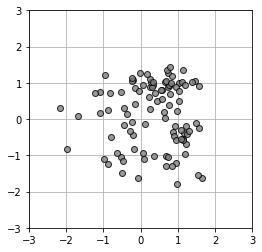

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data generation
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N,3),dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3,3]
X_range1 = [-3,3]
X_col = ['cornflowerblue','black','white']
Mu = np.array([[-.5,-.5],[.5,1.0],[1,-.5]])
Sig = np.array([[.7,.7],[.8,.3],[.3,.8]])
Pi = np.array([0.4,0.8,1])

for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n,k] = 1
            break
    for k in range(2):
        X[n,k] = (np.random.randn()*Sig[T3[n,:] == 1,k] + Mu[T3[n,:] == 1,k ])

# data show
def show_data(x):
    plt.plot(x[:,0],x[:,1],linestyle='none',marker='o',markersize=6,markeredgecolor='black',color='gray',alpha=0.8)
    plt.grid(True)

# main
plt.figure(1,figsize=(4,4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz',X=X,X_range0=X_range0,X_range1=X_range1)



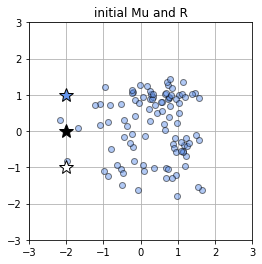

In [2]:
# Mu R init
Mu = np.array([[-2,1],[-2,0],[-2,-1]])
R = np.c_[np.ones((N,1),dtype=int),np.zeros((N,2),dtype=int)]

# show data function
def show_prm(x,r,mu,col):
    for k in range(K):
        plt.plot(x[r[:,k] == 1,0],x[r[:,k] == 1,1],marker='o',markerfacecolor=X_col[k],markeredgecolor='k',markersize=6,alpha=0.5,linestyle='none')
        plt.plot(mu[k,0],mu[k,1],marker='*',markerfacecolor=X_col[k],markersize=15,markeredgecolor='k',markeredgewidth=1)
    
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)

plt.figure(figsize=(4,4))
R = np.c_[np.ones((N,1)),np.zeros((N,2))]
show_prm(X,R,Mu,X_col)
plt.title('initial Mu and R')
plt.show()

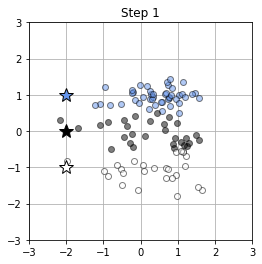

In [3]:
def step1_kmeans(x0,x1,mu):
    N = len(x0)
    r = np.zeros((N,K))
    
    for n in range(N):
        wk = np.zeros(K)
        
        for k in range(K):
            wk[k] = (x0[n] - mu[k,0])**2 + (x1[n] - mu[k,1])**2
        
        r[n,np.argmin(wk)] = 1
    
    return r


plt.figure(figsize=(4,4))
R = step1_kmeans(X[:,0],X[:,1],Mu)
show_prm(X,R,Mu,X_col)
plt.title('Step 1')
plt.show()

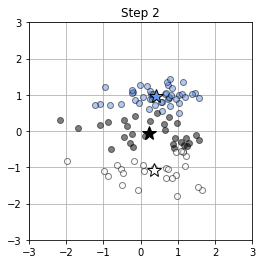

In [4]:
# Mu
def step2_kmeans(x0,x1,r):
    mu = np.zeros((K,2))
    
    for k in range(K):
        mu[k,0] = np.sum(r[:,k]*x0) / np.sum(r[:,k])
        mu[k,1] = np.sum(r[:,k]*x1) / np.sum(r[:,k])
    
    return mu


plt.figure(figsize=(4,4))
Mu = step2_kmeans(X[:,0],X[:,1],R)
show_prm(X,R,Mu,X_col)
plt.title('Step 2')
plt.show()

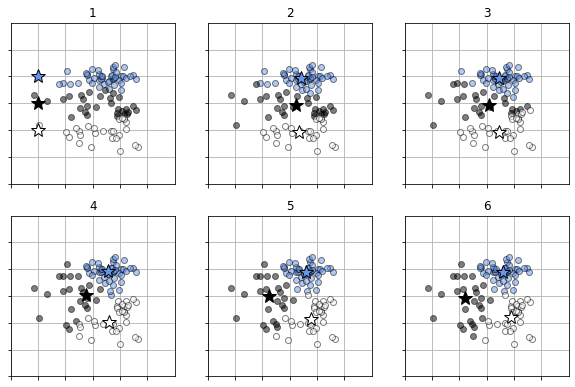

In [5]:
plt.figure(1,figsize=(10,6.5))
Mu = np.array([[-2,1],[-2,0],[-2,-1]])
max_it = 6

for it in range(0,max_it):
    plt.subplot(2,3,it+1)
    R = step1_kmeans(X[:,0],X[:,1],Mu)
    show_prm(X,R,Mu,X_col)
    plt.title("{0:d}".format(it+1))
    plt.xticks(range(X_range0[0],X_range0[1]),"")
    plt.yticks(range(X_range1[0],X_range1[1]),"")
    Mu = step2_kmeans(X[:,0],X[:,1],R)

plt.show()

In [6]:
# 目的関数
def distortion_measure(x0,x1,r,mu):
    N = len(x0)
    J = 0
    
    for n in range(N):
        for k in range(K):
            J = J + r[n,k]*((x0[n] - mu[k,0])**2 + (x1[n] - mu[k,1])**2)
    
    return J

# test
# Mu R init
Mu = np.array([[-2,1],[-2,0],[-2,-1]])
R = np.c_[np.ones((N,1),dtype=int),np.zeros((N,2),dtype=int)]
distortion_measure(X[:,0],X[:,1],R,Mu)


771.7091170334878

[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


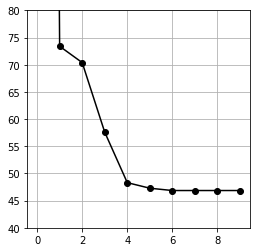

In [8]:
# Mu R init
N = X.shape[0]
K = 3
Mu = np.array([[-2,1],[-2,0],[-2,-1]])
R = np.c_[np.ones((N,1),dtype=int),np.zeros((N,2),dtype=int)]
max_it = 10
it = 0
DM = np.zeros(max_it)

for it in range(0,max_it):
    R = step1_kmeans(X[:,0],X[:,1],Mu)
    DM[it] = distortion_measure(X[:,0],X[:,1],R,Mu)
    Mu = step2_kmeans(X[:,0],X[:,1],R)

print(np.round(DM,2))
plt.figure(2,figsize=(4,4))
plt.plot(DM,color='black',linestyle='-',marker='o')
plt.ylim(40,80)
plt.grid(True)
plt.show()

In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
import numpy as np

wk = np.load('data_ch9.npz')
X = wk['X']
X_range0 = wk['X_range0']
X_range1 = wk['X_range1']

# Gauss function
def gauss(x,mu,sigma):
    N,D = x.shape
    c1 = 1 / (2*np.pi)**(D/2)
    c2 = 1 / (np.linalg.det(sigma)**(1/2))
    inv_sigma = np.linalg.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3,inv_sigma)
    c5 = np.zeros(N)
    
    for d in range(D):
        c5 = c5 + c4[:,d]*c3[:,d]
    
    p = c1 * c2*np.exp(-c5 / 2)
    
    return p

x = np.array([[1,2],[2,1],[3,4]])
mu = np.array([1,2])
sigma = np.array([[1,0],[0,1]])
print(gauss(x,mu,sigma))

[0.15915494 0.05854983 0.00291502]
